Generate adjusted f and 25 random **x**, and calculate sign(f(x)).  
initiate w_0.

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import random

x = []
y = []
wf = np.array([random.gauss(0, 1), random.gauss(0, 1), random.gauss(0, 1)])
#adjust wf
if wf[2] != 0:
    wf = wf / wf[2]
print(f'ideal weight:{wf}')
#input data
for _ in range(25):
    #random x
    vec = np.array([1, random.gauss(0, 1), random.gauss(0, 1)])
    x.append(vec)
    y.append(np.sign(np.dot(wf, vec)))
w = np.array([0, 0, 0])

ideal weight:[-0.06349919  3.98354374  1.        ]


Run PLA(Perceptron Learning Algorithm) until there exist a weight with **no mistake**.  
Then, print out the weight.

In [62]:
index = 0
#check to find the best w
while index < len(x):
    #if sign(h(x)) is not same as y:
    if np.sign(np.dot(x[index], w)) != y[index]:
        w = w + y[index] * x[index]
        index = 0 #reset
    else:
        index += 1
#adjust w
if w[2] != 0:
    w = w / w[2]
print(f'the best h is {w}.')

the best h is [0.         5.76556772 1.        ].


Separate good data and bad data, then plot the data and lines.

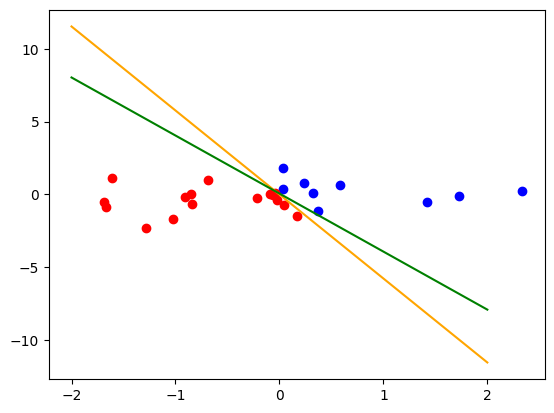

In [63]:
#plot time
fig, ax = plt.subplots()
x1p = []
x2p = []
x1n = []
x2n = []
#separate good and bad x
for num in range(len(x)):
    if y[num] > 0:
        x1p.append(x[num][1])
        x2p.append(x[num][2])
    else:
        x1n.append(x[num][1])
        x2n.append(x[num][2])
#vertical line
if w[2] == 0: # changed from w0 + w1*x1 = 0   
    #the estimated h(x) line  
    x1_values = np.linspace((-1 * w[0] / w[1]), (-1 * w[0] / w[1]), 20)
    x2_values = np.linspace(-2, 2, 20)
    #the real f(x) line  
    x1_values_wf = np.linspace((-1 * wf[0] / wf[1]), (-1 * wf[0] / wf[1]), 20)
    x2_values_wf = np.linspace(-2, 2, 20)
#slant or horizontal line
else: #changed from w0 + w1*x1 + w2*x2 = 0
    #the estimated h(x) line  
    x1_values = np.linspace(-2, 2, 20) 
    x2_values = (-1 * w[1] / w[2]) * x1_values + (-1 * w[0] / w[2])
    #the real f(x) line
    x1_values_wf = np.linspace(-2, 2, 20)
    x2_values_wf = (-1 * wf[1] / wf[2]) * x1_values_wf + (-1 * wf[0] / wf[2])
#draw the data
ax.scatter(x1p, x2p, c='blue')
ax.scatter(x1n, x2n, c='red')
#draw the lines
ax.plot(x1_values, x2_values, color = 'orange')
ax.plot(x1_values_wf, x2_values_wf, color = 'green')
plt.show()

Green one is the **real** f(x) line, and orange one is the **estimated** h(x) line. 